In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataset/labels.csv')
data

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [3]:
data.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


<AxesSubplot:>

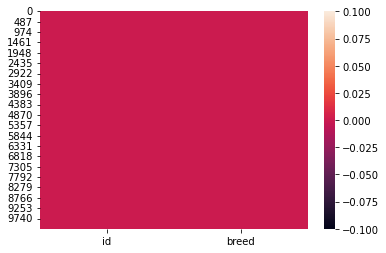

In [5]:
import seaborn as sns
sns.heatmap(data.isnull())

In [6]:
#no null values
data['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [23]:
labels = data['breed'].unique().tolist()

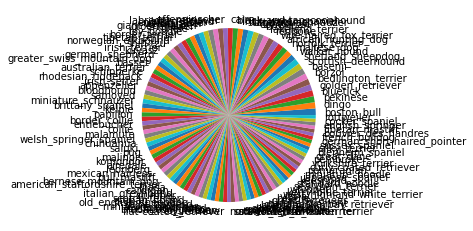

In [153]:
import matplotlib.pyplot as plt
plt.pie(data['breed'].value_counts(), labels=labels)
plt.show()

<AxesSubplot:>

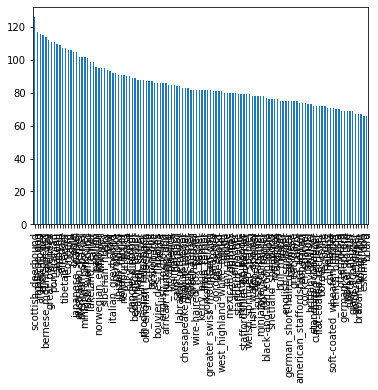

In [152]:
data['breed'].value_counts().plot.bar()

In [7]:
#there are 120 breeds to classify into and the data is relatively balanced
#let us organize the data on the basis of labels
import os
os.mkdir('dataset/organized')

In [8]:
os.mkdir('dataset/organized/training')
os.mkdir('dataset/organized/validating')

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [18]:
for label in labels:
    parent1 = 'dataset/organized/training/'
    parent2 = 'dataset/organized/validating/'
    label_dir = label
    path1 = os.path.join(parent1, label_dir)
    path2 = os.path.join(parent2, label_dir)
    os.mkdir(path1)
    os.mkdir(path2)

In [14]:
import shutil
img_test = test.iloc[:, 0].values
label_test = test.iloc[:, 1].values

In [19]:
for i in range(0, len(img_test)):
    cur_path = 'dataset/train/'+img_test[i]+'.jpg'
    path = 'dataset/organized/validating/'+label_test[i]+'/'+img_test[i]+'.jpg'
    shutil.copyfile(cur_path, path)

In [20]:
img_train = train.iloc[:,0].values
label_train = train.iloc[:,1].values

In [22]:
for i in range(0, len(img_train)):
    cur_path = 'dataset/train/'+img_train[i]+'.jpg'
    path = 'dataset/organized/training/'+label_train[i]+'/'+img_train[i]+'.jpg'
    shutil.copyfile(cur_path, path)

In [ ]:
let us look at a couple of 